In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

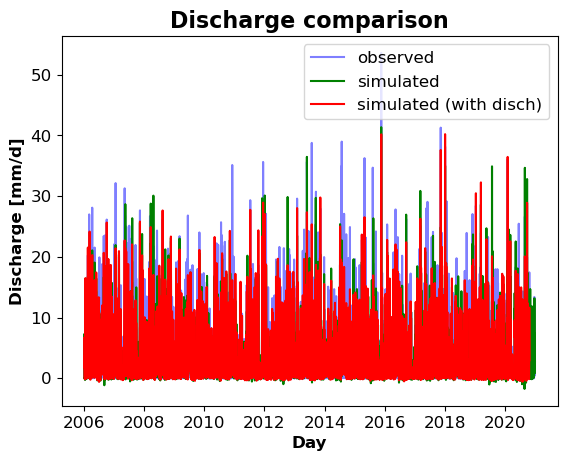

In [6]:

# Load the CSV files
y_obs = pd.read_csv('y_obs.csv', parse_dates=[0])
y_sim = pd.read_csv('y_sim.csv', parse_dates=[0])
y_sim_with_disch = pd.read_csv(r'U:\02_Software\Github\lstm_backward\results\inverse_experiment\y_sim.csv', parse_dates=[0])

# Set the first unnamed column (dates) as the index
y_obs.set_index(y_obs.columns[0], inplace=True)
y_sim.set_index(y_sim.columns[0], inplace=True)
y_sim_with_disch.set_index(y_sim_with_disch.columns[0], inplace=True)

# Extract the series for the basin to analyze
basin_to_analyze = 'GRDC_6335125'
observed = y_obs[basin_to_analyze]
simulated = y_sim[basin_to_analyze]
simulated_with_disch = y_sim_with_disch[basin_to_analyze]

# Define the color palette
color_palette = {
    "observed": "blue",
    "LSTM": "green",
    "LSTM_with_disch": "red"
}

# Plot observed and both sets of simulated discharges
plt.plot(observed, label="observed", color=color_palette["observed"], alpha=0.5)
plt.plot(simulated, label="simulated", color=color_palette["LSTM"])
plt.plot(simulated_with_disch, label="simulated (with disch)", color=color_palette["LSTM_with_disch"])

# Format plot
plt.xlabel('Day', fontsize=12, fontweight='bold')
plt.ylabel('Discharge [mm/d]', fontsize=12, fontweight='bold')
plt.title('Discharge comparison', fontsize=16, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc="upper right", fontsize=12)

# Save the plot (uncomment the line below to save the plot)
# save_folder = 'path_to_save_folder'
# plt.savefig(save_folder+'/Model_Comparison.png', bbox_inches='tight', pad_inches=0)

# Display the plot
plt.show()


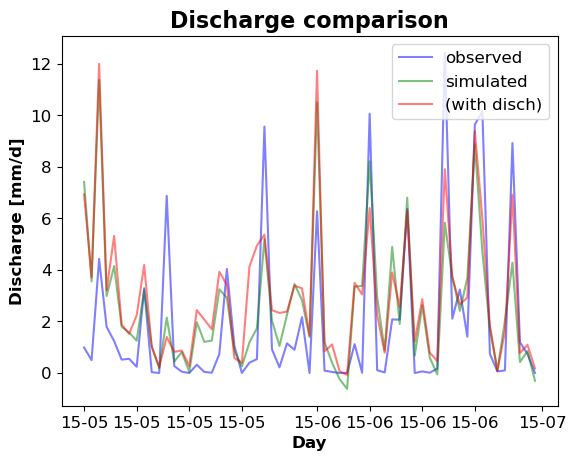

In [20]:
# Subset to date range
# Define the date range
start_date = '2015-05-01'  # Replace with your start date
end_date = '2015-06-30'    # Replace with your end date

# Subset the DataFrames to the specified date range
y_obs_subset = y_obs.loc[start_date:end_date]
y_sim_subset = y_sim.loc[start_date:end_date]
y_sim_with_disch_subset = y_sim_with_disch.loc[start_date:end_date]

# Extract the series for the basin to analyze
basin_to_analyze = 'GRDC_6337350'
observed = y_obs_subset[basin_to_analyze]
simulated = y_sim_subset[basin_to_analyze]
simulated_with_disch = y_sim_with_disch_subset[basin_to_analyze]

# Define the color palette
color_palette = {
    "observed": "blue",
    "LSTM": "green",
    "LSTM_with_disch": "red"
}

# Plot observed and both sets of simulated discharges
plt.plot(observed, label="observed", color=color_palette["observed"], alpha=0.5)
plt.plot(simulated, label="simulated", color=color_palette["LSTM"], alpha=0.5)
plt.plot(simulated_with_disch, label="(with disch)", color=color_palette["LSTM_with_disch"], alpha=0.5)

# Format x-axis to show only the year and month
date_format = mdates.DateFormatter('%y-%m')
plt.gca().xaxis.set_major_formatter(date_format)

# Format plot
plt.xlabel('Day', fontsize=12, fontweight='bold')
plt.ylabel('Discharge [mm/d]', fontsize=12, fontweight='bold')
plt.title('Discharge comparison', fontsize=16, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc="upper right", fontsize=12)

# Save the plot (uncomment the line below to save the plot)
# save_folder = 'path_to_save_folder'
# plt.savefig(save_folder+'/Model_Comparison.png', bbox_inches='tight', pad_inches=0)

# Display the plot
plt.show()

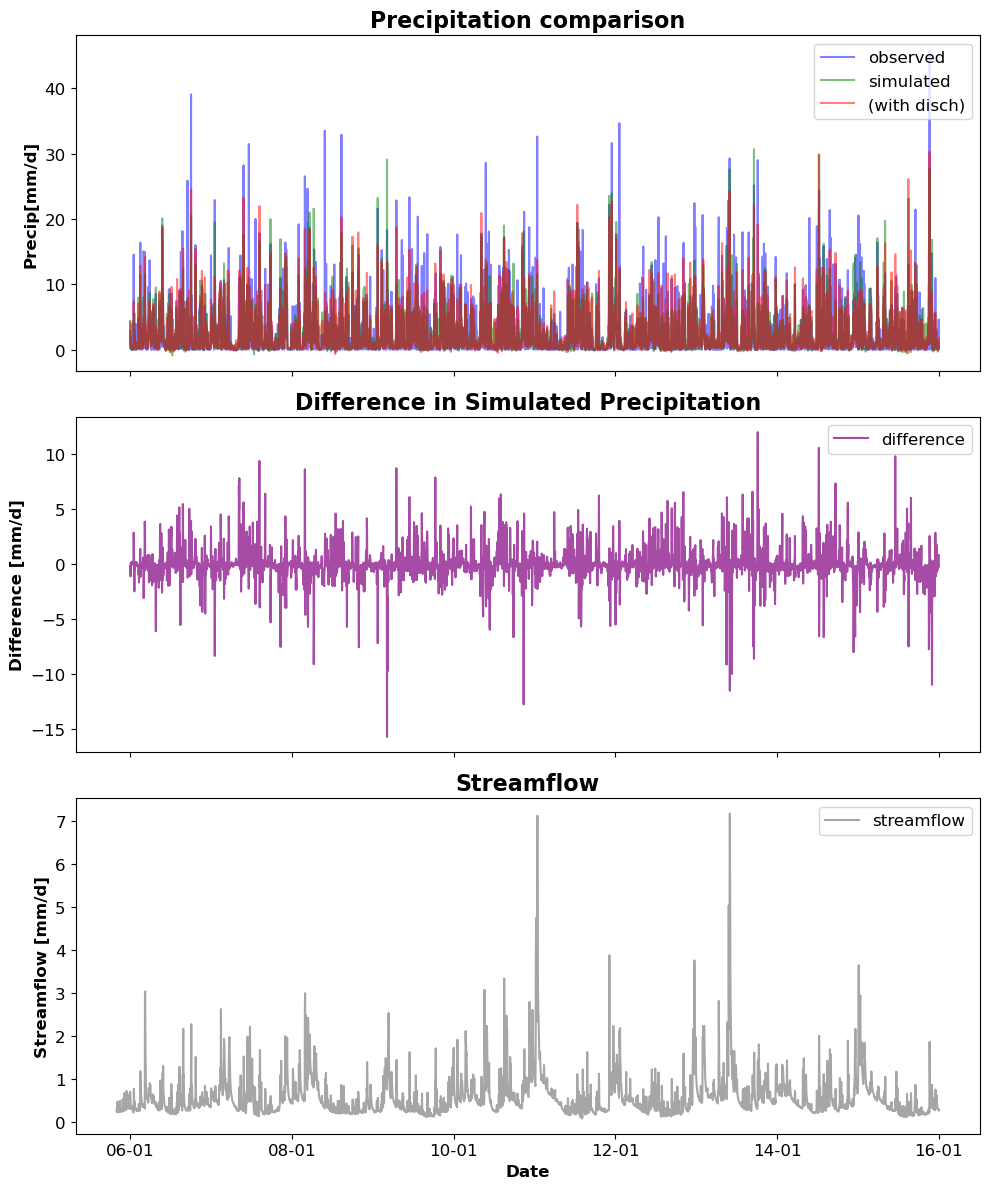

<Figure size 640x480 with 0 Axes>

In [37]:
# Define the date range
start_date = '2005-11-01'  # Replace with your start date
end_date = '2016-01-01'    # Replace with your end date

# Subset the DataFrames to the specified date range
y_obs_subset = y_obs.loc[start_date:end_date]
y_sim_subset = y_sim.loc[start_date:end_date]
y_sim_with_disch_subset = y_sim_with_disch.loc[start_date:end_date]

# Extract the series for the basin to analyze
basin_to_analyze = 'GRDC_6335167'
observed = y_obs_subset[basin_to_analyze]
simulated = y_sim_subset[basin_to_analyze]
simulated_with_disch = y_sim_with_disch_subset[basin_to_analyze]
# Calculate the difference for the second subplot
difference = simulated_with_disch - simulated

# Path to the CSV files
csv_path = f"S:/ashish/01_Analysis/01_Europe_Flood_Analysis/GRDC_Caravan/GRDC-Caravan-extension-csv/timeseries/csv/grdc/{basin_to_analyze}.csv"

# Read the CSV file into a DataFrame
data = pd.read_csv(csv_path, parse_dates=['date'], index_col='date')

# Subset the DataFrame to the specified date range
data_subset = data.loc[start_date:end_date]

# Extract the streamflow column
streamflow = data_subset['streamflow']

# Define the color palette
color_palette = {
    "observed": "blue",
    "LSTM": "green",
    "LSTM_with_disch": "red"
}

# Create a figure and three subplots vertically
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Plotting the first subplot (discharge comparison)
ax1.plot(observed, label="observed", color=color_palette["observed"], alpha=0.5)
ax1.plot(simulated, label="simulated", color=color_palette["LSTM"], alpha=0.5)
ax1.plot(simulated_with_disch, label="(with disch)", color=color_palette["LSTM_with_disch"], alpha=0.5)

# Format x-axis to show only the year and month as 'YY-MM'
date_format = mdates.DateFormatter('%y-%m')
ax1.xaxis.set_major_formatter(date_format)

# Format first subplot
ax1.set_ylabel('Precip[mm/d]', fontsize=12, fontweight='bold')
ax1.set_title('Precipitation comparison', fontsize=16, fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.legend(loc="upper right", fontsize=12)

# Plotting the second subplot (difference between simulated with discharge and simulated)
ax2.plot(difference, label="difference", color='purple', alpha=0.7)

# Format second subplot
ax2.set_ylabel('Difference [mm/d]', fontsize=12, fontweight='bold')
ax2.set_title('Difference in Simulated Precipitation', fontsize=16, fontweight='bold')
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.legend(loc="upper right", fontsize=12)

# Plotting the third subplot (streamflow from CSV file)
ax3.plot(streamflow.index, streamflow, label="streamflow", color='grey', alpha=0.7)

# Format third subplot
ax3.set_xlabel('Date', fontsize=12, fontweight='bold')
ax3.set_ylabel('Streamflow [mm/d]', fontsize=12, fontweight='bold')
ax3.set_title('Streamflow', fontsize=16, fontweight='bold')
ax3.tick_params(axis='both', which='major', labelsize=12)
ax3.legend(loc="upper right", fontsize=12)

# Adjust layout and display
plt.tight_layout()
plt.show()

# Adjust layout and display
plt.tight_layout()
plt.show()


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from ipywidgets import interactive, IntSlider
import numpy as np

# Function to plot the data within a specific date range
def plot_data(start_year, end_year):
    # Define the date range
    start_date = f'{start_year}-01-01'
    end_date = f'{end_year}-12-31'

    # Subset the DataFrames to the specified date range
    y_obs_subset = y_obs.loc[start_date:end_date]
    y_sim_subset = y_sim.loc[start_date:end_date]
    y_sim_with_disch_subset = y_sim_with_disch.loc[start_date:end_date]

    # Extract the series for the basin to analyze
    basin_to_analyze = 'GRDC_6335167'
    observed = y_obs_subset[basin_to_analyze]
    simulated = y_sim_subset[basin_to_analyze]
    simulated_with_disch = y_sim_with_disch_subset[basin_to_analyze]
    difference = simulated_with_disch - simulated

    # Subset the streamflow data
    data_subset = data.loc[start_date:end_date]
    streamflow = data_subset['streamflow']

    # Create a figure and three subplots vertically
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

    # Plotting the first subplot (discharge comparison)
    ax1.plot(observed, label="observed", color=color_palette["observed"], alpha=0.5)
    ax1.plot(simulated, label="simulated", color=color_palette["LSTM"], alpha=0.5)
    ax1.plot(simulated_with_disch, label="(with disch)", color=color_palette["LSTM_with_disch"], alpha=0.5)

    # Format x-axis to show only the year and month as 'YY-MM'
    date_format = mdates.DateFormatter('%y-%m')
    ax1.xaxis.set_major_formatter(date_format)

    # Format first subplot
    ax1.set_ylabel('Precip[mm/d]', fontsize=12, fontweight='bold')
    ax1.set_title('Precipitation comparison', fontsize=16, fontweight='bold')
    ax1.tick_params(axis='both', which='major', labelsize=12)
    ax1.legend(loc="upper right", fontsize=12)

    # Plotting the second subplot (difference between simulated with discharge and simulated)
    ax2.plot(difference, label="difference", color='purple', alpha=0.7)

    # Format second subplot
    ax2.set_ylabel('Difference [mm/d]', fontsize=12, fontweight='bold')
    ax2.set_title('Difference in Simulated Precipitation', fontsize=16, fontweight='bold')
    ax2.tick_params(axis='both', which='major', labelsize=12)
    ax2.legend(loc="upper right", fontsize=12)

    # Plotting the third subplot (streamflow from CSV file)
    ax3.plot(streamflow.index, streamflow, label="streamflow", color='grey', alpha=0.7)

    # Format third subplot
    ax3.set_xlabel('Date', fontsize=12, fontweight='bold')
    ax3.set_ylabel('Streamflow [mm/d]', fontsize=12, fontweight='bold')
    ax3.set_title('Streamflow', fontsize=16, fontweight='bold')
    ax3.tick_params(axis='both', which='major', labelsize=12)
    ax3.legend(loc="upper right", fontsize=12)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

# Load your data here
# y_obs, y_sim, y_sim_with_disch, and data should be your preloaded DataFrames

# Define the color palette
color_palette = {
    "observed": "blue",
    "LSTM": "green",
    "LSTM_with_disch": "red"
}

# Interactive slider
interactive_plot = interactive(plot_data, 
                               start_year=IntSlider(min=2005, max=2015, step=1, value=2005, description='Start Year'),
                               end_year=IntSlider(min=2006, max=2016, step=1, value=2016, description='End Year'))
interactive_plot


interactive(children=(IntSlider(value=2005, description='Start Year', max=2015, min=2005), IntSlider(value=201…

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from ipywidgets import interactive, DatePicker
import datetime

# Sample DataFrames
# Replace these lines with your actual data loading code
# y_obs, y_sim, y_sim_with_disch, and data should be your preloaded DataFrames

# Define the color palette
color_palette = {
    "observed": "blue",
    "LSTM": "green",
    "LSTM_with_disch": "red"
}

# Load your data here
# Path to the CSV files
basin_to_analyze = 'GRDC_6335167'
csv_path = f"S:/ashish/01_Analysis/01_Europe_Flood_Analysis/GRDC_Caravan/GRDC-Caravan-extension-csv/timeseries/csv/grdc/{basin_to_analyze}.csv"

# Read the CSV file into a DataFrame
data = pd.read_csv(csv_path, parse_dates=['date'], index_col='date')

# Function to plot the data within a specific date range
def plot_data(start_date, end_date):
    # Convert datetime objects to string
    start_date_str = start_date.strftime('%Y-%m-%d')
    end_date_str = end_date.strftime('%Y-%m-%d')
    
    # Subset the DataFrames to the specified date range
    y_obs_subset = y_obs.loc[start_date_str:end_date_str]
    y_sim_subset = y_sim.loc[start_date_str:end_date_str]
    y_sim_with_disch_subset = y_sim_with_disch.loc[start_date_str:end_date_str]

    # Extract the series for the basin to analyze
    observed = y_obs_subset[basin_to_analyze]
    simulated = y_sim_subset[basin_to_analyze]
    simulated_with_disch = y_sim_with_disch_subset[basin_to_analyze]
    difference = simulated_with_disch - simulated

    # Subset the streamflow data
    data_subset = data.loc[start_date_str:end_date_str]
    streamflow = data_subset['streamflow']

    # Create a figure and three subplots vertically
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

    # Plotting the first subplot (discharge comparison)
    ax1.plot(observed, label="observed", color=color_palette["observed"], alpha=0.5)
    ax1.plot(simulated, label="simulated", color=color_palette["LSTM"], alpha=0.5)
    ax1.plot(simulated_with_disch, label="(with disch)", color=color_palette["LSTM_with_disch"], alpha=0.5)

    # Format x-axis to show only the year and month as 'YY-MM'
    date_format = mdates.DateFormatter('%y-%m')
    ax1.xaxis.set_major_formatter(date_format)

    # Format first subplot
    ax1.set_ylabel('Precip[mm/d]', fontsize=12, fontweight='bold')
    ax1.set_title('Precipitation comparison', fontsize=16, fontweight='bold')
    ax1.tick_params(axis='both', which='major', labelsize=12)
    ax1.legend(loc="upper right", fontsize=12)

    # Plotting the second subplot (difference between simulated with discharge and simulated)
    ax2.plot(difference, label="difference", color='purple', alpha=0.7)

    # Format second subplot
    ax2.set_ylabel('Difference [mm/d]', fontsize=12, fontweight='bold')
    ax2.set_title('Difference in Simulated Precipitation', fontsize=16, fontweight='bold')
    ax2.tick_params(axis='both', which='major', labelsize=12)
    ax2.legend(loc="upper right", fontsize=12)

    # Plotting the third subplot (streamflow from CSV file)
    ax3.plot(streamflow.index, streamflow, label="streamflow", color='grey', alpha=0.7)

    # Format third subplot
    ax3.set_xlabel('Date', fontsize=12, fontweight='bold')
    ax3.set_ylabel('Streamflow [mm/d]', fontsize=12, fontweight='bold')
    ax3.set_title('Streamflow', fontsize=16, fontweight='bold')
    ax3.tick_params(axis='both', which='major', labelsize=12)
    ax3.legend(loc="upper right", fontsize=12)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

# Interactive date pickers
start_date_picker = DatePicker(description='Start Date', value=datetime.date(2005, 1, 1))
end_date_picker = DatePicker(description='End Date', value=datetime.date(2016, 1, 1))

interactive_plot = interactive(plot_data, start_date=start_date_picker, end_date=end_date_picker)
interactive_plot


interactive(children=(DatePicker(value=datetime.date(2005, 1, 1), description='Start Date', step=1), DatePicke…